In [ ]:
"""Exploration code for ReDI's InternetoPlants for kids workshop. 
   Sensing plant related environmental paramters with Arduino and 
   recording/plotting/processing them."""

__author__      = "ReDI School Munich"
__copyright__   = "GPLv3"

In [71]:
import serial
import pandas
import matplotlib.pyplot as pyplot

In [86]:
# configure serial port
serial_port = '/dev/tty.usbmodem14201'

# initialise serial interface
ser = serial.Serial(serial_port)
ser.flushInput()

# name and sequence of data
sensor_parameter = ["air_temperature", "air_humidty", "soil_humidity", "brightness"]

# init data array
sensor_data_panda = pandas.DataFrame(columns=sensor_parameter)

while True:
    try:
        # read serial byte data
        sensor_data_raw = ser.readline()
        # convert byte data to UTF string
        sensor_data_str = sensor_data_raw[0:len(sensor_data_raw)-2].decode("utf-8")
        # convert UTF string to array
        sensor_data_arr = sensor_data_str.split(",")
        # length fits to parameter names, parse and store
        if len(sensor_data_arr) == len(sensor_parameter):
            # parse
            sensor_data_dict = {sensor_parameter[i]:float(sensor_data_arr[i]) for i in range(len(sensor_parameter))}
            # store
            sensor_data_panda = sensor_data_panda.append(sensor_data_dict,ignore_index=True)
        else:
            print("Sensor array length does match expected number of parameters.")
    #     # live plotting, not available in jupyter (this way)
    #     if len(sensor_data_panda)==1:
    #         data_axis = sensor_data_panda.plot()
    #     elif len(sensor_data_panda)>0 and len(sensor_data_panda)%5==0:
    #         sensor_data_panda.plot(ax=data_axis)
    #         pyplot.pause(0.05)
        print(sensor_data_dict)
    except:
        print("Interrupt")
        ser.close()
        break
plt.show()

{'air_temperature': 25.01, 'air_humidty': 50.48}
{'air_temperature': 25.01, 'air_humidty': 50.42}
{'air_temperature': 25.01, 'air_humidty': 50.36}
{'air_temperature': 25.0, 'air_humidty': 50.33}
{'air_temperature': 25.0, 'air_humidty': 50.35}
{'air_temperature': 25.0, 'air_humidty': 50.51}
{'air_temperature': 24.99, 'air_humidty': 50.68}
{'air_temperature': 24.99, 'air_humidty': 50.81}
{'air_temperature': 24.99, 'air_humidty': 50.88}
{'air_temperature': 24.99, 'air_humidty': 50.98}
{'air_temperature': 25.42, 'air_humidty': 52.0}
{'air_temperature': 25.69, 'air_humidty': 56.34}
{'air_temperature': 25.83, 'air_humidty': 61.29}
Interrupt


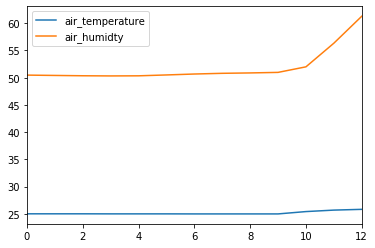

In [87]:
# plotting data
# sensor_data_panda.plot()